<a href="https://colab.research.google.com/github/thak123/winter-school-ffzg-2023/blob/main/1_Day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Lets say hello

In [1]:
print("hello world")

hello world


In [2]:
!python -V

Python 3.8.10


## 2. Requirements

### Installing packages

In [3]:
pip install -U scikit-learn pandas numpy matplotlib gensim  POT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.3/682.3 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created whee

## 3. Importing the libraries

In [1]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import pickle
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## 3.a. Code to download data file

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time




In [3]:
# categories = [
#     "alt.atheism",
#     "comp.graphics",
#     "comp.sys.ibm.pc.hardware",
#     "comp.sys.mac.hardware",
#     "comp.windows.x",
#     "misc.forsale",
#     "rec.autos",
#     "rec.motorcycles",
#     "rec.sport.baseball",
#     "rec.sport.hockey",
#     "sci.crypt",
#     "sci.electronics",
#     "sci.med",
#     "sci.space",
#     "soc.religion.christian",
#     "talk.politics.guns",
#     "talk.politics.mideast",
#     "talk.politics.misc",
#     "talk.religion.misc",
# ]

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

In [4]:
# newsgroup_data = fetch_20newsgroups(
#         subset="all",
#         categories=categories,
#         shuffle=True,
#         random_state=42,
#     )

data_train = fetch_20newsgroups(
        subset="train",
        categories=categories,
        shuffle=True,
        random_state=42,
        # remove=remove,
    )

data_test = fetch_20newsgroups(
        subset="test",
        categories=categories,
        shuffle=True,
        random_state=42,
        # remove=remove,
    )
  

In [5]:
# order of labels in `target_names` can be different from `categories`
target_names = data_train.target_names

# split target in a training set and a test set
y_train, y_test = data_train.target, data_test.target



In [6]:
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()
def preprocess(X):
    documents = []
    for sen in range(0, len(X)):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(X[sen]))
        
        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
        
        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
        
        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)
        
        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)
        
        # Converting to Lowercase
        document = document.lower()
        
        # Lemmatization
        document = document.split()

        document = [stemmer.lemmatize(word) for word in document]
        document = ' '.join(document)
        
        documents.append(document)
    return documents

In [7]:
train_documents = preprocess(data_train.data)
test_documents = preprocess(data_test.data)

In [8]:
len(train_documents),len(test_documents)

(2034, 1353)

In [9]:
# Extracting features from the training data using a sparse vectorizer
# vectorizer = TfidfVectorizer(
#     sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
# )
# X_train = vectorizer.fit_transform(data_train.data)

# # Extracting features from the test data using the same vectorizer
# X_test = vectorizer.transform(data_test.data)

# feature_names = vectorizer.get_feature_names_out()

In [10]:
train_documents

['from rych festival ed ac uk hawkes subject 3d where did all the texture rule go line 21 hi ve noticed that if you only save model with all your mapping plane positioned carefully to 3d file that when you reload it after restarting 3d they are given default position and orientation but if you save to prj file their position orientation are preserved doe anyone know why this information is not stored in the 3d file nothing is explicitly said in the manual about saving texture rule in the prj file d like to be able to read the texture rule information doe anyone have the format for the prj file is the cel file format available from somewhere rych rycharde hawkes email rych festival ed ac uk virtual environment laboratory dept of psychology tel 44 31 650 3426 univ of edinburgh fax 44 31 667 0150',
 'subject re biblical backing of koresh 3 02 tape cite enclosed from kmcvay oneb almanac bc ca ken mcvay organization the old frog almanac line 20 in article 20apr199301460499 utarlg uta edu b6

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X_train = vectorizer.fit_transform(train_documents).toarray()

In [12]:
feature_names = vectorizer.get_feature_names_out()

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X_train = tfidfconverter.fit_transform(X_train).toarray()

In [14]:
X_test = vectorizer.transform(test_documents).toarray()
X_test = tfidfconverter.transform(X_test).toarray()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

# vectorizer = TfidfVectorizer (max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))

X_train = vectorizer.fit_transform(train_documents).toarray()
X_test = vectorizer.transform(test_documents).toarray()

In [16]:
#TODO Change classifier here
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=0)

In [17]:
predictions = text_classifier.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[228  17  13  61]
 [  1 373  13   2]
 [  2  35 355   2]
 [ 36  24   7 184]]
              precision    recall  f1-score   support

           0       0.85      0.71      0.78       319
           1       0.83      0.96      0.89       389
           2       0.91      0.90      0.91       394
           3       0.74      0.73      0.74       251

    accuracy                           0.84      1353
   macro avg       0.83      0.83      0.83      1353
weighted avg       0.84      0.84      0.84      1353

0.8425720620842572


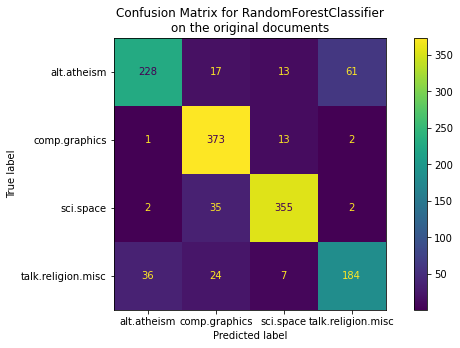

In [19]:
# import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, predictions, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {text_classifier.__class__.__name__}\non the original documents"
)

# Excercise 

## 1. Increase the number of classes and recheck the performance matrices

## 2. Try changing the values in the tf idf vectoriser and rechec the performance matrices
- max_features=2500 
- min_df=7 
- max_df=0.8 
- stop_words=stopwords.words('english')

## 3. Change different classifiers
- [Naïve Bayes ](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn-naive-bayes-multinomialnb)
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
    
- [K-Nearest Neighbors (kNN)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

- [Decision Trees](https://scikit-learn.org/stable/modules/tree.html#classification) 

- Support Vector Machine 



In [20]:
from sklearn.neural_network import MLPClassifier 
from sklearn import preprocessing

- Documentation - [MLP - Multi-layer Perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [21]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

In [22]:
clf = MLPClassifier(alpha=1e-5,
                    # hidden_layer_sizes=(5, 4),
                    hidden_layer_sizes=(150,100,50),
                    early_stopping= True,
                    max_iter=300,
                    random_state=1)
clf.fit(X_scaled, y_train)
predictions = clf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[176   0  25 118]
 [  0 172  78 139]
 [  0   0 378  16]
 [ 13   0  10 228]]
              precision    recall  f1-score   support

           0       0.93      0.55      0.69       319
           1       1.00      0.44      0.61       389
           2       0.77      0.96      0.85       394
           3       0.46      0.91      0.61       251

    accuracy                           0.71      1353
   macro avg       0.79      0.72      0.69      1353
weighted avg       0.82      0.71      0.70      1353

0.70509977827051


In [23]:
## he vector representations

In [24]:
import multiprocessing
import gensim.downloader
from gensim.models import word2vec, FastText
import pandas as pd
import re

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import plotly.graph_objects as go

import numpy as np

import warnings
warnings.filterwarnings('ignore')



In [25]:
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [26]:
glove_vectors = gensim.downloader.load('glove-twitter-25')

In [27]:
glove_vectors.most_similar('twitter')

[('facebook', 0.948005199432373),
 ('tweet', 0.9403423070907593),
 ('fb', 0.9342358708381653),
 ('instagram', 0.9104824066162109),
 ('chat', 0.8964964747428894),
 ('hashtag', 0.8885937333106995),
 ('tweets', 0.8878158330917358),
 ('tl', 0.8778461217880249),
 ('link', 0.8778210878372192),
 ('internet', 0.8753897547721863)]

In [28]:
# Print results
print("Cosine similarity:", glove_vectors.similarity("alice","wonderland"))

Cosine similarity: 0.7177193


In [29]:
for index, word in enumerate(glove_vectors.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(glove_vectors.index_to_key)} is {word}")

word #0/1193514 is <user>
word #1/1193514 is .
word #2/1193514 is :
word #3/1193514 is rt
word #4/1193514 is ,
word #5/1193514 is <repeat>
word #6/1193514 is <hashtag>
word #7/1193514 is <number>
word #8/1193514 is <url>
word #9/1193514 is !


In [30]:
vec_king = glove_vectors['king']

In [31]:
vec_king

array([-0.74501 , -0.11992 ,  0.37329 ,  0.36847 , -0.4472  , -0.2288  ,
        0.70118 ,  0.82872 ,  0.39486 , -0.58347 ,  0.41488 ,  0.37074 ,
       -3.6906  , -0.20101 ,  0.11472 , -0.34661 ,  0.36208 ,  0.095679,
       -0.01765 ,  0.68498 , -0.049013,  0.54049 , -0.21005 , -0.65397 ,
        0.64556 ], dtype=float32)

In [32]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, glove_vectors.similarity(w1, w2)))

'car'	'minivan'	0.50
'car'	'bicycle'	0.70
'car'	'airplane'	0.73
'car'	'cereal'	0.54
'car'	'communism'	0.11


In [33]:
print(glove_vectors.most_similar(positive=['car', 'minivan'], topn=5))

[('truck', 0.9217724204063416), ('cab', 0.9050741791725159), ('parked', 0.8964848518371582), ('passenger', 0.8858598470687866), ('wheelchair', 0.8818767070770264)]


In [34]:
print(glove_vectors.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

sea


In [35]:
glove_vectors.most_similar(positive=["woman", "queen"], negative=["king"], topn=3)

[('person', 0.8882095217704773),
 ('gentleman', 0.8867188692092896),
 ('mother', 0.8794952034950256)]

In [36]:
sentence_obama = 'Obama speaks to the media in Illinois'.lower().split()
sentence_president = 'The president greets the press in Chicago'.lower().split()


In [37]:
from gensim.parsing.preprocessing import STOPWORDS
sentence_obama = [w for w in sentence_obama if w not in STOPWORDS]
sentence_president = [w for w in sentence_president if w not in STOPWORDS]

In [38]:
distance = glove_vectors.wmdistance(sentence_obama, sentence_president)
print(f"Word Movers Distance is {distance} (lower means closer)")

Word Movers Distance is 0.7021210644312703 (lower means closer)


In [39]:
# TODO can be taken up as excercise
# fast_text_vectors = gensim.downloader.load("fasttext-wiki-news-subwords-300")

## Not all words are present in the word2vec

In [40]:
try:
    vec_cameroon = glove_vectors['cameroon2']
except KeyError:
    print("The word 'cameroon2' does not appear in this model")

The word 'cameroon2' does not appear in this model


In [41]:
def preprocess_word2vec(X):
    documents = []
    for sen in range(0, len(X)):
        document = gensim.utils.simple_preprocess(X[sen])
        documents.append(document)
    return documents

In [42]:
data_train.data[0]

"From: rych@festival.ed.ac.uk (R Hawkes)\nSubject: 3DS: Where did all the texture rules go?\nLines: 21\n\nHi,\n\nI've noticed that if you only save a model (with all your mapping planes\npositioned carefully) to a .3DS file that when you reload it after restarting\n3DS, they are given a default position and orientation.  But if you save\nto a .PRJ file their positions/orientation are preserved.  Does anyone\nknow why this information is not stored in the .3DS file?  Nothing is\nexplicitly said in the manual about saving texture rules in the .PRJ file. \nI'd like to be able to read the texture rule information, does anyone have \nthe format for the .PRJ file?\n\nIs the .CEL file format available from somewhere?\n\nRych\n\n======================================================================\nRycharde Hawkes\t\t\t\temail: rych@festival.ed.ac.uk\nVirtual Environment Laboratory\nDept. of Psychology\t\t\tTel  : +44 31 650 3426\nUniv. of Edinburgh\t\t\tFax  : +44 31 667 0150\n==============

In [43]:
# Clean data using the built in cleaner in gensim

X_train = preprocess_word2vec(data_train.data)
X_test = preprocess_word2vec(data_test.data)

In [44]:
X_train[0]

['from',
 'rych',
 'festival',
 'ed',
 'ac',
 'uk',
 'hawkes',
 'subject',
 'ds',
 'where',
 'did',
 'all',
 'the',
 'texture',
 'rules',
 'go',
 'lines',
 'hi',
 've',
 'noticed',
 'that',
 'if',
 'you',
 'only',
 'save',
 'model',
 'with',
 'all',
 'your',
 'mapping',
 'planes',
 'positioned',
 'carefully',
 'to',
 'ds',
 'file',
 'that',
 'when',
 'you',
 'reload',
 'it',
 'after',
 'restarting',
 'ds',
 'they',
 'are',
 'given',
 'default',
 'position',
 'and',
 'orientation',
 'but',
 'if',
 'you',
 'save',
 'to',
 'prj',
 'file',
 'their',
 'positions',
 'orientation',
 'are',
 'preserved',
 'does',
 'anyone',
 'know',
 'why',
 'this',
 'information',
 'is',
 'not',
 'stored',
 'in',
 'the',
 'ds',
 'file',
 'nothing',
 'is',
 'explicitly',
 'said',
 'in',
 'the',
 'manual',
 'about',
 'saving',
 'texture',
 'rules',
 'in',
 'the',
 'prj',
 'file',
 'like',
 'to',
 'be',
 'able',
 'to',
 'read',
 'the',
 'texture',
 'rule',
 'information',
 'does',
 'anyone',
 'have',
 'the',
 'f

In [48]:

# w2v_model = gensim.downloader.load('word2vec-google-news-300')
w2v_model = gensim.downloader.load('glove-twitter-25')

In [49]:
w2v_model.index_to_key 

['<user>',
 '.',
 ':',
 'rt',
 ',',
 '<repeat>',
 '<hashtag>',
 '<number>',
 '<url>',
 '!',
 'i',
 'a',
 '"',
 'the',
 '?',
 'you',
 'to',
 '(',
 '<allcaps>',
 '<elong>',
 ')',
 'me',
 'de',
 '<smile>',
 '！',
 'que',
 'and',
 '。',
 '-',
 'my',
 'no',
 '、',
 'is',
 'it',
 '…',
 'in',
 'n',
 'for',
 '/',
 'of',
 'la',
 "'s",
 '*',
 'do',
 "n't",
 'that',
 'on',
 'y',
 "'",
 'e',
 'o',
 'u',
 'en',
 'this',
 'el',
 'so',
 'be',
 "'m",
 'with',
 'just',
 '>',
 'your',
 '^',
 'like',
 'have',
 'te',
 'at',
 '？',
 'love',
 'se',
 'are',
 '<',
 'm',
 'r',
 'if',
 'all',
 'b',
 '・',
 'not',
 'but',
 'we',
 'es',
 'ya',
 '&',
 'follow',
 'up',
 'what',
 'get',
 'lol',
 'un',
 '♥',
 'lo',
 'when',
 'was',
 '“',
 '”',
 'one',
 'por',
 'si',
 'out',
 '_',
 'mi',
 'can',
 '<sadface>',
 'من',
 '♡',
 '´',
 'he',
 'con',
 'they',
 'now',
 'go',
 '،',
 'para',
 'los',
 'know',
 'haha',
 'good',
 'tu',
 'back',
 '~',
 'about',
 'new',
 ';',
 'as',
 'day',
 'how',
 'who',
 'will',
 'want',
 'people',
 'y

In [50]:
# Generate aggregated sentence vectors based on the word vectors for each word in the sentence
# Replace the words in each text message with the learned word vector
words = set(w2v_model.index_to_key )
X_train_vect = np.array([np.array([w2v_model[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([w2v_model[i] for i in ls if i in words])
                         for ls in X_test])

In [51]:
X_train_vect[0]

array([[-0.61824 , -0.073506,  0.33202 , ...,  0.033165, -0.74508 ,
        -0.20883 ],
       [-0.46441 , -0.079396,  0.78174 , ..., -0.74504 , -0.84183 ,
         1.8161  ],
       [-0.51925 ,  0.07804 ,  0.49926 , ...,  0.24644 , -0.29632 ,
        -0.31582 ],
       ...,
       [ 0.32543 , -0.089637, -0.14733 , ..., -0.6175  , -0.54592 ,
        -0.069893],
       [-1.2358  , -0.39188 ,  0.27714 , ..., -1.1489  , -1.0541  ,
        -0.084965],
       [ 0.37274 ,  0.81089 ,  0.011115, ...,  0.64656 ,  0.19068 ,
        -0.98818 ]], dtype=float32)

In [52]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [53]:
X_train_vect_avg[0].shape

(25,)

In [58]:
# Are our sentence vector lengths consistent?
for i, v in enumerate(X_train_vect_avg):
    print("", len(v))

 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25
 25


In [60]:
# Instantiate and fit a basic Random Forest model on top of the vectors
rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect_avg, y_train.ravel())

In [61]:
# Use the trained model to make predictions on the test data
predictions = rf_model.predict(X_test_vect_avg)


In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[208  20  34  57]
 [  6 325  55   3]
 [ 24  63 302   5]
 [102  16  28 105]]
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       319
           1       0.77      0.84      0.80       389
           2       0.72      0.77      0.74       394
           3       0.62      0.42      0.50       251

    accuracy                           0.69      1353
   macro avg       0.68      0.67      0.67      1353
weighted avg       0.69      0.69      0.69      1353

0.6947524020694752
